In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# independent variable
X = df.iloc[:, :-1].values
# dependent variable
y = df.iloc[:, -1].values

In [24]:
# import dataset
df = pd.read_csv("../../dataset/car.csv") 
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [32]:
# independent variable
X = df.iloc[:, :-1].values
# dependent variable
y = df.iloc[:, -1].values
 

## Spliting dataset into training set and test set

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


## Feature scaling

In [50]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)


## Train the dataset using random forest classification

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

classifier = RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=0)
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)

print("Accuracy score => ", accuracy_score(y_test, y_pred))
print("Confution matrix =>", confusion_matrix(y_test, y_pred))


Accuracy score =>  0.91
Confution matrix => [[63  5]
 [ 4 28]]


C:\Users\HANNAN\AppData\Local\Temp\ipykernel_1180\3927980191.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


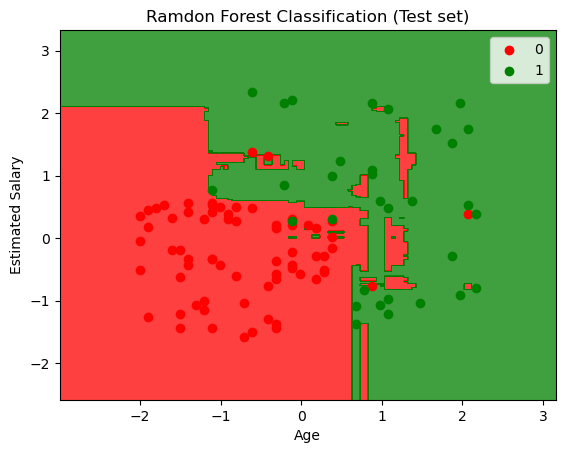

In [73]:
 # Plotting the decision boundary and test set results
from matplotlib.colors import ListedColormap
def plot_decision_boundary(X_set, y_set, title):
    X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.01),
                         np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.75, cmap=ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c=ListedColormap(('red', 'green'))(i), label=j)
    plt.title(title)
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show();

plot_decision_boundary(X_test, y_test, title="Ramdon Forest Classification (Test set)")